In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
import pickle

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Dataset/train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
df.shape

(31962, 3)

In [6]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
df=df.drop(['id'],axis=1)

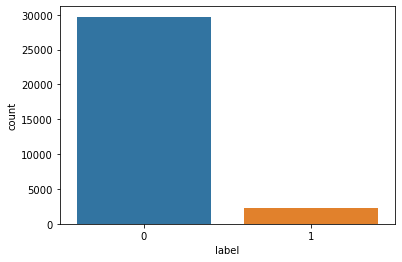

In [8]:
sns.countplot(x='label',data=df)

In [10]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [9]:
#for removing patterns
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for word in r:
        input_text=re.sub(word,"",input_text)
    return input_text

In [10]:
#reoving user handles
df['clean_text']=np.vectorize(remove_pattern)(df['tweet'],'@[\w]*')
df.drop('tweet',axis=1,inplace=True)
df.head()

,label,clean_text
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
#removing special characters and symbols
df['clean_text']=df['clean_text'].str.replace('[^a-zA-Z#]'," ")
df.head()

,label,clean_text
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide society now #motivation


In [12]:
#removing short word
df['clean_text']=df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,label,clean_text
0,0,when father dysfunctional selfish drags kids i...
1,0,thanks #lyft credit cause they offer wheelchai...
2,0,bihday your majesty
3,0,#model love take with time
4,0,factsguide society #motivation


In [13]:
#tokenizing
tokenized_tweets=df['clean_text'].apply(lambda x: x.split())
tokenized_tweets

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwaves, trying, wrap, herself...
31959            [listening, songs, monday, morning, work]
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                                      [thank, follow]
Name: clean_text, Length: 31962, dtype: object

In [14]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
tokenized_tweets=tokenized_tweets.apply(lambda x: [ps.stem(word) for word in x])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_text, dtype: object

In [15]:
#converting to single sentence
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i]= " ".join(tokenized_tweets[i])

In [16]:
#commenting to original data
df['clean_text']=tokenized_tweets
df.head()

,label,clean_text
0,0,when father dysfunct selfish drag kid into dys...
1,0,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesti
3,0,#model love take with time
4,0,factsguid societi #motiv


In [17]:
from wordcloud import WordCloud
wc=WordCloud()

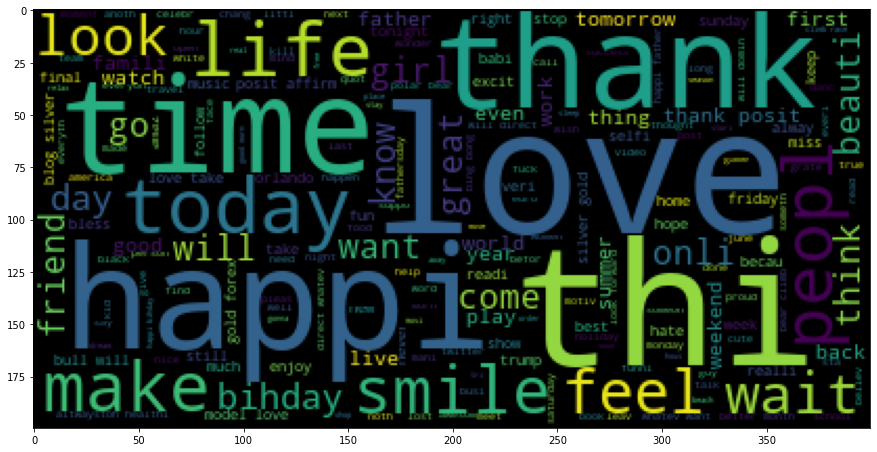

In [18]:
#visualize frequent words
allwords=" ".join([x for x in df['clean_text']])

plt.figure(figsize=(15,8))
plt.imshow(wc.generate(allwords))
plt.show()

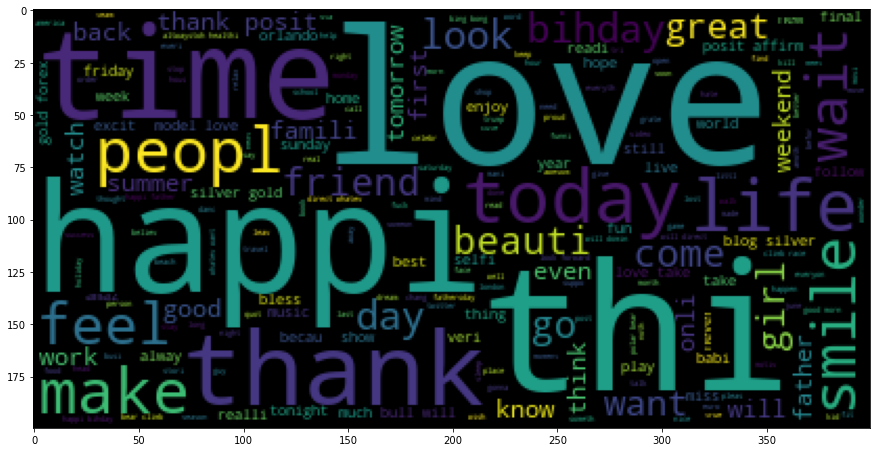

In [19]:
#visualize +ve words
pos_words=" ".join([x for x in df['clean_text'][df['label']==0]])

plt.figure(figsize=(15,8))
plt.imshow(wc.generate(pos_words))
plt.show()

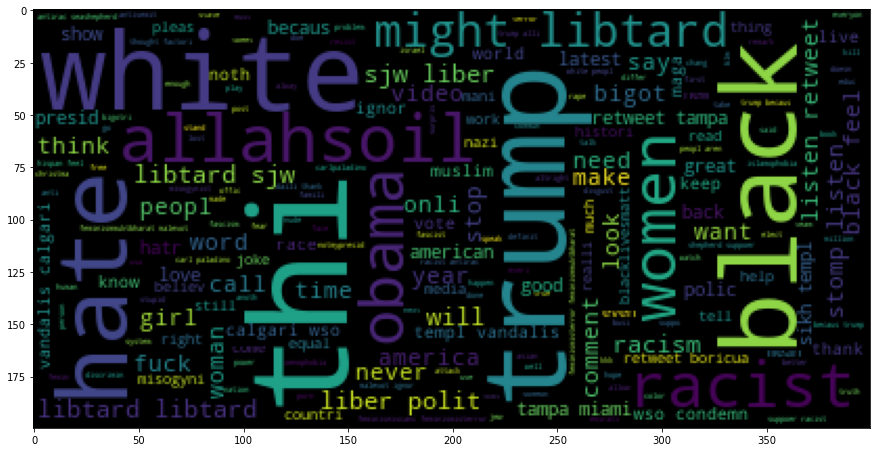

In [20]:
#visualize -ve words
neg_words=" ".join([x for x in df['clean_text'][df['label']==1]])

plt.figure(figsize=(15,8))
plt.imshow(wc.generate(neg_words))
plt.show()

In [22]:
#creating BOW
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000,stop_words='english')

#Saving the Count Vector as tranform.pkl file 
#which will be used to convert text into count vector
pickle.dump(cv,open('transform.pkl','wb'))

X=cv.fit_transform(df['clean_text'])

#Saving the vocabulary in form of words
words = cv.get_feature_names()
pickle.dump(words,open('vocabulary.pkl','wb'))

y=df['label']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,stratify = df['label'])

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

#Training accuracy
print('Training:', nb.score(x_train,y_train))

y_pred_nb=nb.predict(x_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_nb))

print('f1score:',f1_score(y_test,y_pred_nb))

Training: 0.9405921232742774
Testing: 0.9360237760050055
f1score: 0.5238649592549476


In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

#Training accuracy
print('Training:', lr.score(x_train,y_train))

y_pred_lr=lr.predict(x_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_lr))

print('f1score:',f1_score(y_test,y_pred_lr))

Training: 0.9535374868004224
Testing: 0.9479117785077429
f1score: 0.5052005943536404


In [33]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

#Training accuracy
print('Training:', svc.score(x_train,y_train))

y_pred_svc=svc.predict(x_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_svc))

print('f1score:',f1_score(y_test,y_pred_svc))

Training: 0.963158512260941
Testing: 0.9513530423901142
f1score: 0.517829457364341


In [34]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

#Training accuracy
print('Training:',rf.score(x_train,y_train))

y_pred_rf=rf.predict(x_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_rf))

print('f1score:',f1_score(y_test,y_pred_rf))

Training: 0.9923344675192616
Testing: 0.9465039887376818
f1score: 0.59478672985782


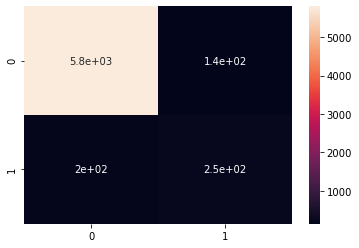

In [35]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True)

In [36]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5945
           1       0.63      0.56      0.59       448

    accuracy                           0.95      6393
   macro avg       0.80      0.77      0.78      6393
weighted avg       0.94      0.95      0.94      6393



In [37]:
#dumping the model
pickle.dump(rf, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
#testing the model
test_df=pd.read_csv('Dataset/test.csv')
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [40]:
# Load count vector from disk
cv = pickle.load(open('transform.pkl', 'rb'))
# Load the vocabulary
words = pickle.load(open('vocabulary.pkl', 'rb'))

In [56]:
test_df['tweet']

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [48]:
countVect = CountVectorizer(vocabulary=words)
sentence = countVect.transform(test_df['tweet'])
review_prediction = pickled_model.predict(sentence)

In [54]:
review_prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
for i in review_prediction:
    if i==0:
        print('Positive review')
    else:
        print('Negative review')

Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive

Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Negative review
Positive review
Positive

Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive

Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive

Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive

Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Negative review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative

Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive

Negative review
Negative review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive

Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive

Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive

Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive

Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive

Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Negative review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive review
Positive

In [66]:
example='This is good review.'

#converting to raw text document
input=[example]

In [67]:
#custom detection
sentence = countVect.transform(input)
review_prediction = pickled_model.predict(sentence)
review_prediction
for i in review_prediction:
    if i==0:
        print('Positive review')
    else:
        print('Negative review')

Positive review
